In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training data:", x_train.shape)
print("Testing data:", x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data: (60000, 28, 28)
Testing data: (10000, 28, 28)


In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [4]:
model = models.Sequential([
    layers.Input(shape=(28,28,1)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [5]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [6]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.1
)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 30s 34ms/step - accuracy: 0.8555 - loss: 0.4571 - val_accuracy: 0.9857 - val_loss: 0.0513
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 30s 35ms/step - accuracy: 0.9814 - loss: 0.0596 - val_accuracy: 0.9867 - val_loss: 0.0407
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 29s 34ms/step - accuracy: 0.9880 - loss: 0.0376 - val_accuracy: 0.9875 - val_loss: 0.0414
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 42s 35ms/step - accuracy: 0.9911 - loss: 0.0282 - val_accuracy: 0.9887 - val_loss: 0.0376
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 29s 35ms/step - accuracy: 0.9925 - loss: 0.0229 - val_accuracy: 0.9888 - val_loss: 0.0350


In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9888 - loss: 0.0352
Test Accuracy: 0.9908999800682068


In [8]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


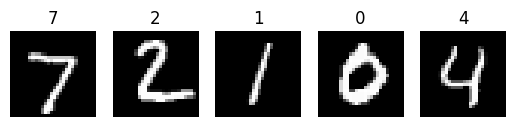

In [9]:
def plot_digit(image):
    plt.imshow(image, cmap='gray')
    plt.axis('off')

for i in range(5):
    plt.subplot(1,5,i+1)
    plot_digit(x_test[i].reshape(28,28))
    plt.title(np.argmax(predictions[i]))

plt.show()

In [10]:
model.save("digit_cnn_model.h5")

In [11]:
from tensorflow.keras.models import load_model
loaded_model = load_model("digit_cnn_model.h5")

test_loss, test_acc = loaded_model.evaluate(x_test, y_test)
print("Loaded Model Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9888 - loss: 0.0352
Loaded Model Accuracy: 0.9908999800682068


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Predicted: 1


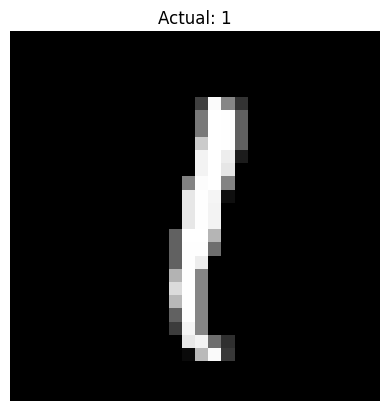

In [12]:
index = np.random.randint(0, len(x_test))

plt.imshow(x_test[index].reshape(28,28), cmap='gray')
plt.title("Actual: " + str(y_test[index]))
plt.axis('off')

prediction = np.argmax(loaded_model.predict(x_test[index].reshape(1,28,28,1)))
print("Predicted:", prediction)

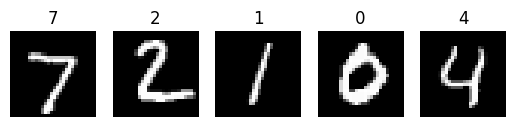

In [13]:
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(np.argmax(predictions[i]))
    plt.axis('off')

plt.savefig("sample_predictions.png")
plt.show()